In [1]:
from src.dataset.build import build_dataloader
from tqdm import tqdm
import torch.nn.functional as F
from torch.optim import Adam
from src.model.baseline import HNeRVMae
import torch
import numpy as np
from src.evaluation.metric import *
import wandb
from torchsummary import summary
import os
from pytorch_msssim import ms_ssim, ssim
from src.evaluation.evaluation import save_checkpoint, resume_checkpoint
import random

os.environ["WANDB_SILENT"] = "true"

SEED = 42
torch.manual_seed(SEED)
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False
np.random.seed(SEED)

# DataLoader
BATCH_SIZE = 10
FRAME_INTERVAL = 6
CROP_SIZE = 960


In [2]:
dataset, dataloader = build_dataloader(
    name="uvghd30",
    batch_size=BATCH_SIZE,
    frame_interval=FRAME_INTERVAL,
    crop_size=CROP_SIZE,
)

torch.Size([10, 6, 960, 960, 3])


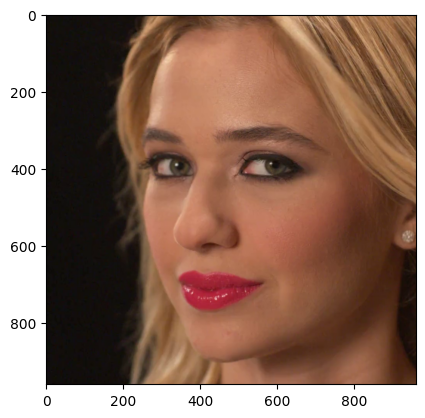

In [3]:
data = next(iter(dataloader))
print(data.shape)

import matplotlib.pyplot as plt
fr1 = data[0][1]
plt.imshow(fr1)

In [4]:
data = torch.mul(data, 255)
gt = data.reshape(BATCH_SIZE, FRAME_INTERVAL, 3, CROP_SIZE, CROP_SIZE)

In [5]:
data = next(iter(dataloader)).permute(0, 4, 1, 2, 3)
data = torch.mul(data, 255)
gt = data.reshape(BATCH_SIZE, FRAME_INTERVAL, 3, CROP_SIZE, CROP_SIZE)

In [6]:
wandb.init(project="hello")
wandb.log({"video": wandb.Video(gt, fps=6, format="mp4")})
wandb.finish()